# An example of an optimal pruning based routing algorithm
- based on a simple graph and Dijkstra's algorithm with concave cost function
- Create a simple graph with multiple edge's attributes¶
    - weight = w_ij
    - concave = c_ij where i,j is nodes

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Create a simple graph

In [2]:
def add_multi_link_attributes(G,attr1,attr2):
    """
    This funtion is to add the multiple link attributes to graph G
    input: G : graph
            attr1 : link attribute 1
            attr2 : link attribute 2
    output : G
    """
    i = 0
    for (u, v) in G.edges():
        G.add_edge(u,v,w=attr1[i],c=attr2[i])
        i = i+1 
    return G


In [3]:
def draw_graph(G,pos):
    """
    This function is to draw a graph with the fixed position
    input : G : graph
            pos: postions of all nodes with the dictionary of coordinates (x,y)
    """
    edge_labels = {}  ## add edge lables from edge attribute
    for u, v, data in G.edges(data=True):
        edge_labels[u, v] = data

    nx.draw_networkx(G,pos)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

In [4]:
def remove_Edge(G,rm_edge_list):
    """
    This function is to remove edges in the rm_edge_list from G
    """
    G.remove_edges_from(rm_edge_list)
    G.edges()
    return G
    

In [5]:
def compare_path(path1,path2):
    
    if collections.Counter(path1) == collections.Counter(path2):
        print ("The lists l1 and l2 are the same") 
        flag = True
    else: 
        print ("The lists l1 and l2 are not the same") 
        flag = False
    return flag

In [6]:
def additive_path_cost(G, path, attr):
    """
    This function is to find the path cost based on the additive costs
    : Path_Cost = sum_{edges in the path}attr[edge]
    Input : G : graph
            path : path is a list of nodes in the path
            attr : attribute of edges
    output : path_cost
    """
    return sum([G[path[i]][path[i+1]][attr] for i in range(len(path)-1)])

In [7]:
## Calculate concave path cost from attr
def max_path_cost(G, path, attr):
    """
    This function is to find the path cost based on the additive costs
    : Path_Cost = max{edges in the path}attr[edge]
    Input : G : graph
            path : path is a list of nodes in the path
            attr : attribute of edges
    output : path_cost
    """
    return max([G[path[i]][path[i+1]][attr] for i in range(len(path)-1)])

In [8]:
def rm_edge_constraint(G,Cons):
    rm_edge_list = []
    for u, v, data in G.edges(data=True):
        e = (u,v)
        cost = G.get_edge_data(*e)
        print(cost)
        if cost['c'] >= Cons:
            rm_edge_list.append(e)
            print(rm_edge_list)
    
    remove_Edge(G,rm_edge_list)

    return G

In [9]:
def has_path(G, source, target):
    """Return True if G has a path from source to target, False otherwise.

    Parameters
    ----------
    G : NetworkX graph

    source : node
       Starting node for path

    target : node
       Ending node for path
    """
    try:
        sp = nx.shortest_path(G,source, target)
    except nx.NetworkXNoPath:
        return False
    return True


In [10]:
def Optimum_prun_based_routing(G,S,D,L):
    """
    This function is to find the optimal path from S to D with constraint L 
    Input : G : graph
            S : Source
            D : Destination
            L : constraint
    """
    if has_path(G, S, D):
        
        Shortest_path = nx.dijkstra_path(G, S, D, weight='w')
        Opt_path = Shortest_path
        while len(Shortest_path) != 0:
            path_cost = additive_path_cost(G, Shortest_path, 'w') 
            print(path_cost)
            if path_cost <= L:
                """go to concave cost"""
                PathConcave_cost  = max_path_cost(G, Shortest_path, 'c')
                G = rm_edge_constraint(G,PathConcave_cost) # remove all links where the concave link is greater than PathConcave_cost
            
                Opt_path = Shortest_path
                if has_path(G, S, D):
                    Shortest_path = nx.dijkstra_path(G, S, D, weight='w')
                else:
                    Shortest_path = []
            
            else:
                pass 
    else:
        print('No path from', S, ' to ', D)
        Opt_path = []
    return Opt_path
        
        
        

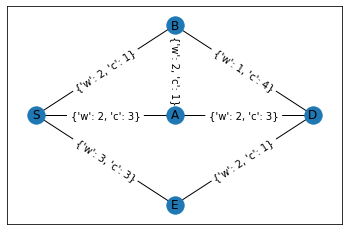

In [11]:
G = nx.Graph()
edge_list = [('S', 'B'), ('S', 'A'), ('S','E'), ('B','A'), ('B','D'), ('A','D'), ('E','D')]
Weight_edge_list = [2, 2, 3, 2, 1, 2, 2]
Concave_edge_list = [1, 3, 3, 1, 4, 3, 1]
pos = { 'S': (0,50), 'B': (50, 100), 'A': (50, 50), 'E': (50, 0), 'D': (100, 50)} # draw by position

G.add_edges_from(edge_list)
G = add_multi_link_attributes(G,Weight_edge_list,Concave_edge_list)
draw_graph(G,pos)


In [12]:
Optimum_prun_based_routing(G,'S','D',5)

3
{'w': 2, 'c': 1}
{'w': 2, 'c': 3}
{'w': 3, 'c': 3}
{'w': 2, 'c': 1}
{'w': 1, 'c': 4}
[('B', 'D')]
{'w': 2, 'c': 3}
{'w': 2, 'c': 1}
4
{'w': 2, 'c': 1}
{'w': 2, 'c': 3}
[('S', 'A')]
{'w': 3, 'c': 3}
[('S', 'A'), ('S', 'E')]
{'w': 2, 'c': 1}
{'w': 2, 'c': 3}
[('S', 'A'), ('S', 'E'), ('A', 'D')]
{'w': 2, 'c': 1}


['S', 'A', 'D']